In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mustafa.gordesli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Put the hyparameters at the top like this to make it easier to change and edit.

In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [4]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [5]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [7]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [8]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [9]:
print(train_sequences[10])

[2431, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1144, 1693, 1, 1720, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4516, 1, 2, 2874, 1506, 352, 4740, 1, 52, 341, 1, 352, 2172, 3963, 41, 22, 3796, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2366, 347, 4741, 1, 365, 22, 1, 787, 2367, 1, 4303, 138, 10, 1, 3665, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1693, 1021, 1, 4998, 807, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4999, 542, 492, 1, 1445, 4742, 778, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2971, 4736, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4304, 247]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [10]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

426
200
192
200
186
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [12]:
print(train_sequences[10])

[2431, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1144, 1693, 1, 1720, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4516, 1, 2, 2874, 1506, 352, 4740, 1, 52, 341, 1, 352, 2172, 3963, 41, 22, 3796, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2366, 347, 4741, 1, 365, 22, 1, 787, 2367, 1, 4303, 138, 10, 1, 3665, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1693, 1021, 1, 4998, 807, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4999, 542, 492, 1, 1445, 4742, 778, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2971, 4736, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4304, 247]


In [13]:
print(train_padded[10])

[2431    1  225 4996   22  641  587  225 4996    1    1 1662    1    1
 2431   22  565    1    1  140  278    1  140  278  796  822  662 2307
    1 1144 1693    1 1720 4997    1    1    1    1    1 4739    1    1
  122 4516    1    2 2874 1506  352 4740    1   52  341    1  352 2172
 3963   41   22 3796    1    1    1    1  542    1    1    1  835  631
 2366  347 4741    1  365   22    1  787 2367    1 4303  138   10    1
 3665  682 3532    1   22    1  414  822  662    1   90   13  633    1
  225 4996    1  599    1 1693 1021    1 4998  807 1864  117    1    1
    1 2974   22    1   99  278    1 1607 4999  542  492    1 1445 4742
  778 1320    1 1861   10   33  641  319    1   62  478  565  301 1507
   22  479    1    1 1665    1  797    1 3066    1 1365    6    1 2431
  565   22 2971 4736    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4304  247    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [14]:
print(train_sequences[0])

[91, 160, 1141, 1106, 49, 979, 755, 1, 89, 1304, 4290, 129, 175, 3653, 1214, 1194, 1577, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3262, 1215, 2421, 570, 451, 1376, 58, 3379, 3522, 1660, 8, 921, 730, 10, 844, 1, 9, 598, 1578, 1107, 395, 1941, 1106, 731, 49, 537, 1398, 2012, 1622, 134, 249, 113, 2355, 795, 4981, 980, 584, 10, 3958, 3959, 921, 2562, 129, 344, 175, 3653, 1, 1, 39, 62, 2867, 28, 9, 4724, 18, 1305, 136, 416, 7, 143, 1424, 71, 4503, 436, 4982, 91, 1107, 77, 1, 82, 2013, 53, 1, 91, 6, 1008, 609, 89, 1304, 91, 1963, 131, 137, 420, 9, 2868, 38, 152, 1233, 89, 1304, 4725, 7, 436, 4982, 3154, 6, 2492, 1, 431, 1126, 1, 1425, 571, 1234, 1903, 1, 766, 9, 537, 1398, 2012, 134, 2069, 400, 845, 1964, 1600, 34, 1716, 2869, 1, 1, 2422, 244, 9, 2624, 82, 732, 6, 1172, 1195, 152, 720, 591, 1, 124, 28, 1305, 1689, 432, 83, 933, 115, 20, 14, 18, 3155, 1, 37, 1485, 1, 23, 37, 87, 335, 2356, 37, 467, 255, 1964, 1359, 328, 1, 299, 732, 1173, 18, 2870, 1716, 1, 294, 756, 1074, 395, 2014, 387, 431

In [15]:
print(train_padded[0])

[  91  160 1141 1106   49  979  755    1   89 1304 4290  129  175 3653
 1214 1194 1577   42    7  893   91    1  334   85   20   14  130 3262
 1215 2421  570  451 1376   58 3379 3522 1660    8  921  730   10  844
    1    9  598 1578 1107  395 1941 1106  731   49  537 1398 2012 1622
  134  249  113 2355  795 4981  980  584   10 3958 3959  921 2562  129
  344  175 3653    1    1   39   62 2867   28    9 4724   18 1305  136
  416    7  143 1424   71 4503  436 4982   91 1107   77    1   82 2013
   53    1   91    6 1008  609   89 1304   91 1963  131  137  420    9
 2868   38  152 1233   89 1304 4725    7  436 4982 3154    6 2492    1
  431 1126    1 1425  571 1234 1903    1  766    9  537 1398 2012  134
 2069  400  845 1964 1600   34 1716 2869    1    1 2422  244    9 2624
   82  732    6 1172 1195  152  720  591    1  124   28 1305 1689  432
   83  933  115   20   14   18 3155    1   37 1485    1   23   37   87
  335 2356   37  467  255 1964 1359  328    1  299  732 1173   18 2870
 1716 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [16]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [17]:
print(set(labels))

{'entertainment', 'sport', 'politics', 'tech', 'business'}


In [18]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [19]:
print(training_label_seq[0])
print(train_labels[0])
print(training_label_seq[1])
print(train_labels[1])
print(training_label_seq[2])
print(train_labels[2])
print(training_label_seq[4])
print(train_labels[4])
print(training_label_seq[5])
print(train_labels[5])
print(training_label_seq.shape)

print("---")
#print(train_labels)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
tech
[2]
business
[1]
sport
[5]
entertainment
[3]
politics
(1780, 1)
---
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [20]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [21]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

2022-04-12 15:42:26.807510: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 7s - loss: 1.6319 - accuracy: 0.2719 - val_loss: 1.4492 - val_accuracy: 0.3910 - 7s/epoch - 130ms/step
Epoch 2/10
56/56 - 4s - loss: 1.0387 - accuracy: 0.6433 - val_loss: 0.6747 - val_accuracy: 0.7798 - 4s/epoch - 71ms/step
Epoch 3/10
56/56 - 4s - loss: 0.3649 - accuracy: 0.8888 - val_loss: 0.3554 - val_accuracy: 0.8764 - 4s/epoch - 71ms/step
Epoch 4/10
56/56 - 4s - loss: 0.1145 - accuracy: 0.9669 - val_loss: 0.2531 - val_accuracy: 0.9011 - 4s/epoch - 73ms/step
Epoch 5/10
56/56 - 4s - loss: 0.0338 - accuracy: 0.9910 - val_loss: 0.2815 - val_accuracy: 0.9011 - 4s/epoch - 71ms/step
Epoch 6/10
56/56 - 4s - loss: 0.0204 - accuracy: 0.9961 - val_loss: 0.1815 - val_accuracy: 0.9461 - 4s/epoch - 69ms/step
Epoch 7/10
56/56 - 4s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 0.9461 - 4s/epoch - 73ms/step
Epoch 8/10
56/56 - 4s - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.1895 - val_accuracy: 0.9461 - 4s/epoch - 70ms/step
Epoch 9/10
56/56 - 4s - loss: 0

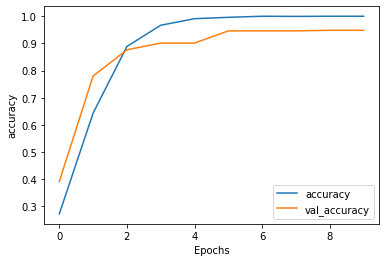

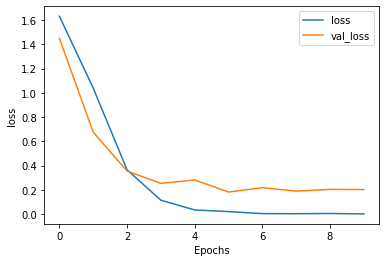

In [24]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [39]:
txt = ["blair ready to call election tony blair seems certain to end weeks of phoney war on monday and announce there will be a general election on 5 may.  the date has been pencilled into the diaries of politicians and political journalists for many months and  despite occasional panics that the prime minister was on the verge of calling a snap poll  it has not shifted. over the weeks  there have been any number of signs that 050505 was going to be the day mr blair would go for an historic third term. and the calling of a special political cabinet meeting has only added to the belief that the announcement is imminent. the prime minister and his campaign boss alan milburn have already insisted the election will be fought on the economy and what they claim is a stark choice between labour s stability and investment against tory cuts and boom and bust.  and chancellor gordon brown has stepped into the front line of the campaign - to the relief of many of his supporters in westminster - to underline that economic message. and it is certain one of the big arguments at the centre of the election battle will be around the big parties  tax and spend policies.  during the phoney campaign  labour got into trouble over its central claim that michael howard was planning £35 bn cuts in public services. the prime minister found himself struggling to explain how a smaller  slower increase in spending planned by the tories compared to labour s plans was a cut. and it looked like the labour campaign - which was already being criticised for being thrown into defensive mode by mr howard on issues such as immigration and health - was on the rocks. then deputy conservative chairman howard flight was reported to have suggested mr howard was secretly planning even bigger  cuts .  he was sacked for his gaffe  but the damage had been done and the faltering labour campaign was back on track. a second central argument will be over taxation  with the tories claiming the chancellor has to fill a black hole at the centre of his finances and will be forced to raise taxes if labour wins again. mr brown slaps that aside  claiming his forecasts are accurate and that previous claims of looming economic disaster have proved inaccurate. as usual  the liberal democrats will have to fight to get their voice heard over the sounds of battle between the two big parties. but leader charles kennedy believes he has set out a distinctive manifesto with plans for a tax rise for the wealthiest to finance extra spending and the abolition of the council tax in favour of a local income tax. other issues are certain to play a part - immigration and asylum  the war on iraq  law and order and education  for example. but  as ever  it will be the economy that will almost certainly decide the outcome. and  whatever that outcome  2005 is set to be a far more lively  even bitter campaign than 2001 s non-event."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
labels = ['none','sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred, labels[np.argmax(pred)])

[[4.5596776e-06 4.5315632e-05 1.9256635e-04 9.9932706e-01 1.4917359e-04
  2.8132004e-04]] politics
